In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy import misc
import cv2


from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.random.seed(42)

In [3]:
def load_data():
    x = glob("fruits/fruits-360/Training/*/")
    img_list = []
    i = 0
    for sub_dir in x:
        for filename in glob(sub_dir + '/*.jpg'):
            img = cv2.imread(filename, 0)
            img_flat = img.flatten()
            img_list.append(img_flat)
            
    return img_list

In [4]:
data = load_data()
print(len(data))

57276


In [5]:
# shape of each image after flatten (coordinates in a n-dim space)
data[0].shape

(10000,)

In [6]:
data[0]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [ ]:
# this is considering each image as having # of pixel number of features (do not run this cell)
kmeans = KMeans(init='k-means++', n_clusters = 10, n_init = 3)
kmeans.fit(data)

In [ ]:
# skip this cell as well - (run this only if you have run the previous cell)
kmeans.labels_

In [7]:
# here we use a method called PCA - principal component analysis - it reduces the 10000 pixel features to just 2 features
from sklearn.decomposition import PCA
reduced_data = PCA(n_components = 2).fit_transform(data)

In [8]:
# now the 10000 is reduced to just 2
reduced_data[0].shape

(2,)

In [10]:
reduced_data[0]

array([-5186.94115935,  -367.97938634])

In [11]:
kmeans_pca = KMeans(init='k-means++', n_clusters=10, n_init=3)
kmeans_pca.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=3, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans_pca.labels_

array([4, 4, 4, ..., 6, 2, 6], dtype=int32)

In [13]:
h = 10 

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

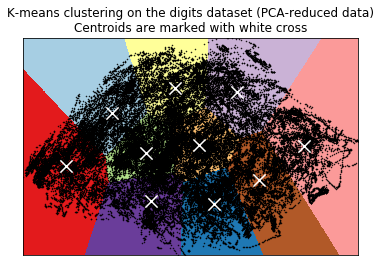

<Figure size 7200x7200 with 0 Axes>

In [24]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', origin = 'lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize = 1)
# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker = 'x', s = 150, linewidths = 3,
            color = 'w', zorder = 10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.figure(figsize=(100,100))
plt.show()